In [1]:
import requests
from bs4 import BeautifulSoup
import re
import json

def get_stock_advice(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        middle_section = soup.find('div', {'class': 'middle_section'})
        data = []
        if middle_section:
            news_list = middle_section.find('ul', {'class': 'news_list'})
            if news_list:
                articles = news_list.find_all('li')
                for article in articles:
                    stock_info = article.find('div', {'class': 'rb_gd14'})
                    stock_name_link = stock_info.find('a')
                    stock_name = stock_name_link.get_text(strip=True)
                    stock_price = stock_info.find_all('strong')[1].get_text(strip=True).replace(',', '')
                    try:
                        stock_price_float = float(stock_price)
                    except ValueError:
                        stock_price_float = 0.0
                    article_link = article.find('div', {'class': 'MT5'}).find('a')
                    recommendation = article_link.get_text(strip=True)
                    recommendation_parts = recommendation.split(':')
                    if len(recommendation_parts) > 1:
                        recommendation_trimmed = recommendation_parts[0].split(';')[0].strip()
                        source = recommendation_parts[-1].strip()
                    else:
                        recommendation_trimmed = recommendation
                        source = ''
                    match = re.search(r'target of Rs (\d+[:,]?\d+)', recommendation)
                    if match:
                        target_value = match.group(1).replace(',', '')
                        try:
                            target_value_float = float(target_value)
                        except ValueError:
                            target_value_float = 0.0
                    else:
                        target_value = ''
                        target_value_float = 0.0
                    revenue = target_value_float - stock_price_float
                    if stock_price_float != 0:
                        profit_percent = (revenue / stock_price_float) * 100
                    else:
                        profit_percent = 0.0
                    data.append({
                        'Stock Name': stock_name,
                        'Price': f'Rs {stock_price}',
                        'Recommendation': recommendation_trimmed,
                        'Target Price': target_value,
                        'Source': source,
                        'Revenue': f'Rs {revenue:.2f}',
                        'Profit Percent': f'{profit_percent:.2f}%'
                    })
            else:
                return {'error': 'No news list found on the page.'}
        else:
            return {'error': 'No middle section found on the page.'}
    else:
        return {'error': 'Failed to retrieve the webpage.'}
    return data

url = 'https://m.moneycontrol.com/markets/stock-advice/'
all_recommended_stocks = get_stock_advice(url)
print(json.dumps(all_recommended_stocks, indent=4))


[
    {
        "Stock Name": "HDFC Bank",
        "Price": "Rs 1517.20",
        "Recommendation": "Buy HDFC Bank",
        "Target Price": "1850",
        "Source": "ICICI Securities",
        "Revenue": "Rs 332.80",
        "Profit Percent": "21.94%"
    },
    {
        "Stock Name": "Tejas Networks",
        "Price": "Rs 1155.20",
        "Recommendation": "Buy Tejas Networks",
        "Target Price": "1100",
        "Source": "Emkay Global Financial",
        "Revenue": "Rs -55.20",
        "Profit Percent": "-4.78%"
    },
    {
        "Stock Name": "Bajaj Finance",
        "Price": "Rs 6836.90",
        "Recommendation": "Buy Bajaj Finance",
        "Target Price": "9000",
        "Source": "Emkay Global Financial",
        "Revenue": "Rs 2163.10",
        "Profit Percent": "31.64%"
    },
    {
        "Stock Name": "Bajaj Finance",
        "Price": "Rs 6836.90",
        "Recommendation": "Buy Bajaj Finance",
        "Target Price": "9000",
        "Source": "Emkay Global Fin

In [14]:
from yahooquery import search
import time

def get_ticker_symbol_yahoo(company_name, retries=5, delay=1):
    for attempt in range(retries):
        try:
            response = search(company_name)
            if 'quotes' in response and response['quotes']:
                symbol = response['quotes'][0]['symbol']
                print(f"Found symbol for {company_name}: {symbol}")
                return symbol
            else:
                print(f"No results found for {company_name}. Response: {response}")
        except Exception as e:
            print(f"Exception fetching data for {company_name}: {e}")
        time.sleep(delay)
    print(f"Failed to get ticker for {company_name} after {retries} attempts")
    return None



tickers = []
for stock in all_recommended_stocks:
    ticker = get_ticker_symbol_yahoo(stock['Stock Name'])
    if ticker:
        tickers.append(ticker)
    time.sleep(1)  # Sleep to avoid rate limiting

tickers = list(filter(None, tickers))  # Remove None values
print(tickers)


Found symbol for HDFC Bank: HDB
Found symbol for Tejas Networks: TEJASNET.BO
Found symbol for Bajaj Finance: BAJFINANCE.NS
Found symbol for Bajaj Finance: BAJFINANCE.NS
Found symbol for Persistent: PERSISTENT.NS
Found symbol for Aditya Birla F: ABFRL.BO
Found symbol for Wipro: WIT
Found symbol for HDFC Life: HDFCLIFE.NS
Found symbol for Patel Eng: PATELENG.BO
Found symbol for Infosys: INFY
Found symbol for Jindal Drilling: JINDRILL.BO
Found symbol for Navneet: NAVNETEDUL.BO
Found symbol for INDUS TOWERS: INDUSTOWER.NS
Found symbol for City Union Bank: CUB.BO
Found symbol for Hatsun Agro: HATSUN.NS
Found symbol for Guj State Petro: GSPL.NS
Found symbol for Adani Ports: ADANIPORTS.BO
Found symbol for Aditya Birla F: ABFRL.BO
Found symbol for Persistent: PERSISTENT.NS
Found symbol for HDFC Life: HDFCLIFE.NS
Found symbol for Bajaj Auto: BAJAJ-AUTO.NS
Found symbol for Bajaj Auto: BAJAJ-AUTO.NS
Found symbol for HDFC Bank: HDB
Found symbol for Infosys: INFY
Found symbol for Guj State Petro: G

In [15]:
tickers

['HDB',
 'TEJASNET.BO',
 'BAJFINANCE.NS',
 'BAJFINANCE.NS',
 'PERSISTENT.NS',
 'ABFRL.BO',
 'WIT',
 'HDFCLIFE.NS',
 'PATELENG.BO',
 'INFY',
 'JINDRILL.BO',
 'NAVNETEDUL.BO',
 'INDUSTOWER.NS',
 'CUB.BO',
 'HATSUN.NS',
 'GSPL.NS',
 'ADANIPORTS.BO',
 'ABFRL.BO',
 'PERSISTENT.NS',
 'HDFCLIFE.NS',
 'BAJAJ-AUTO.NS',
 'BAJAJ-AUTO.NS',
 'HDB',
 'INFY',
 'GSPL.NS']

In [16]:
import yfinance as yf
import pandas as pd

def fetch_stock_data(stocks, period='1mo'):
    stock_data = {}
    for stock in stocks:
        try:
            print(f"Fetching data for {stock}...")
            ticker = yf.Ticker(stock)
            stock_history = ticker.history(period=period)
            if not stock_history.empty:
                stock_data[stock] = stock_history
                print(f"Data for {stock}: {stock_history.head()}")
            else:
                print(f"{stock}: No data found, symbol may be delisted or incorrectly formatted")
        except Exception as e:
            print(f"{stock}: Error fetching data - {e}")
    return stock_data

stock_data = fetch_stock_data(tickers)
print(stock_data)


Fetching data for HDB...
Data for HDB:                                 Open       High        Low      Close  \
Date                                                                    
2024-04-25 00:00:00-04:00  58.029999  58.410000  57.770000  58.330002   
2024-04-26 00:00:00-04:00  58.340000  58.750000  58.180000  58.340000   
2024-04-29 00:00:00-04:00  58.520000  58.689999  58.250000  58.330002   
2024-04-30 00:00:00-04:00  58.000000  58.520000  57.389999  57.599998   
2024-05-01 00:00:00-04:00  57.820000  58.580002  57.680000  58.139999   

                            Volume  Dividends  Stock Splits  
Date                                                         
2024-04-25 00:00:00-04:00  1686700        0.0           0.0  
2024-04-26 00:00:00-04:00  1434900        0.0           0.0  
2024-04-29 00:00:00-04:00  1532200        0.0           0.0  
2024-04-30 00:00:00-04:00  1587100        0.0           0.0  
2024-05-01 00:00:00-04:00  2295200        0.0           0.0  
Fetching data f

In [17]:
import numpy as np

def calculate_metrics(stock_data):
    metrics = {}
    for stock, data in stock_data.items():
        data['Return'] = data['Close'].pct_change()
        volatility = data['Return'].std() * np.sqrt(252 / len(data))
        avg_return = data['Return'].mean() * 252 / len(data)
        metrics[stock] = {'Volatility': volatility, 'Avg_Return': avg_return}
    return metrics

metrics = calculate_metrics(stock_data)
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)


               Volatility  Avg_Return
HDB              0.036227   -0.002469
TEJASNET.BO      0.116233    0.051338
BAJFINANCE.NS    0.070114   -0.039215
PERSISTENT.NS    0.034694    0.015756
ABFRL.BO         0.079708    0.068586
WIT              0.024571    0.001290
HDFCLIFE.NS      0.046710   -0.029054
PATELENG.BO      0.121768   -0.010212
INFY             0.024351    0.011397
JINDRILL.BO      0.083559   -0.064080
NAVNETEDUL.BO    0.105436    0.022693
INDUSTOWER.NS    0.052178   -0.001549
CUB.BO           0.072838   -0.039159
HATSUN.NS        0.049594   -0.062234
GSPL.NS          0.032684   -0.000001
ADANIPORTS.BO    0.068216    0.044186
BAJAJ-AUTO.NS    0.056894    0.018639


In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
metrics_df['Risk_Level'] = kmeans.fit_predict(metrics_df[['Volatility', 'Avg_Return']])

risk_mapping = {0: "low", 1: "mid", 2: "high"}
metrics_df['Risk_Level'] = metrics_df['Risk_Level'].map(risk_mapping)
print(metrics_df)


                 Volatility  Avg_Return Risk_Level
HDFC Bank          0.036227   -0.002469        mid
Tejas Networks     0.116233    0.051338        low
Bajaj Finance      0.070114   -0.039215       high
Persistent         0.034694    0.015756        mid
Aditya Birla F     0.079708    0.068586        low
Wipro              0.024571    0.001290        mid
HDFC Life          0.046710   -0.029054        mid
Patel Eng          0.121768   -0.010212       high
Infosys            0.024351    0.011397        mid
Jindal Drilling    0.083559   -0.064080       high
Navneet            0.105436    0.022693        low
INDUS TOWERS       0.052178   -0.001549        mid
City Union Bank    0.072838   -0.039159       high
Hatsun Agro        0.049594   -0.062234       high
Guj State Petro    0.032684   -0.000001        mid
Adani Ports        0.068216    0.044186        low
Bajaj Auto         0.056894    0.018639        mid


In [33]:
ticker_dict = {
    "HDB": "HDFC Bank",
    "TEJASNET.BO": "Tejas Networks",
    "BAJFINANCE.NS": "Bajaj Finance",
    "PERSISTENT.NS": "Persistent",
    "ABFRL.BO": "Aditya Birla F",
    "WIT": "Wipro",
    "HDFCLIFE.NS": "HDFC Life",
    "PATELENG.BO": "Patel Eng",
    "INFY": "Infosys",
    "JINDRILL.BO": "Jindal Drilling",
    "NAVNETEDUL.BO": "Navneet",
    "INDUSTOWER.NS": "INDUS TOWERS",
    "CUB.BO": "City Union Bank",
    "HATSUN.NS": "Hatsun Agro",
    "GSPL.NS": "Guj State Petro",
    "ADANIPORTS.BO": "Adani Ports",
    "BAJAJ-AUTO.NS": "Bajaj Auto"
}

print(ticker_dict)


{'HDB': 'HDFC Bank', 'TEJASNET.BO': 'Tejas Networks', 'BAJFINANCE.NS': 'Bajaj Finance', 'PERSISTENT.NS': 'Persistent', 'ABFRL.BO': 'Aditya Birla F', 'WIT': 'Wipro', 'HDFCLIFE.NS': 'HDFC Life', 'PATELENG.BO': 'Patel Eng', 'INFY': 'Infosys', 'JINDRILL.BO': 'Jindal Drilling', 'NAVNETEDUL.BO': 'Navneet', 'INDUSTOWER.NS': 'INDUS TOWERS', 'CUB.BO': 'City Union Bank', 'HATSUN.NS': 'Hatsun Agro', 'GSPL.NS': 'Guj State Petro', 'ADANIPORTS.BO': 'Adani Ports', 'BAJAJ-AUTO.NS': 'Bajaj Auto'}


In [34]:
metrics_df.rename(index=ticker_dict, inplace=True)
metrics_df

,Volatility,Avg_Return,Risk_Level
HDFC Bank,0.036227,-0.002469,mid
Tejas Networks,0.116233,0.051338,low
Bajaj Finance,0.070114,-0.039215,high
Persistent,0.034694,0.015756,mid
Aditya Birla F,0.079708,0.068586,low
Wipro,0.024571,0.001290,mid
HDFC Life,0.046710,-0.029054,mid
Patel Eng,0.121768,-0.010212,high
Infosys,0.024351,0.011397,mid
Jindal Drilling,0.083559,-0.064080,high


In [35]:
def generate_recommendations(recommendations, metrics_df):
    clusters = {'low': [], 'mid': [], 'high': []}
    
    for stock in recommendations:
        stock_name = stock['Stock Name']
        target_price = stock['Target Price']
        recommendation = stock['Recommendation']
        risk_level = metrics_df.loc[stock_name, 'Risk_Level']
        
        clusters[risk_level].append({
            'Stock': stock_name,
            'Investment': stock['Price'],
            'Target_Price': target_price,
            'Recommendation': recommendation
        })
    
    return clusters

clusters = generate_recommendations(all_recommended_stocks, metrics_df)
for risk_level, stocks in clusters.items():
    print(f"{risk_level.capitalize()} Risk Stocks:")
    for stock in stocks:
        print(f"Buy {stock['Stock']} at {stock['Investment']} and sell at {stock['Target_Price']} - {stock['Recommendation']}")
    print()


Low Risk Stocks:
Buy Tejas Networks at Rs 1155.20 and sell at 1100 - Buy Tejas Networks
Buy Aditya Birla F at Rs 290.05 and sell at 230 - Reduce Aditya Birla Fashion and Retail
Buy Navneet at Rs 155.25 and sell at 182 - Buy Navneet Education
Buy Adani Ports at Rs 1416.10 and sell at 1590 - Buy Adani Port & SEZ
Buy Aditya Birla F at Rs 290.05 and sell at 297 - Buy Aditya Birla Fashion & Retail

Mid Risk Stocks:
Buy HDFC Bank at Rs 1517.20 and sell at 1850 - Buy HDFC Bank
Buy Persistent at Rs 3555.20 and sell at 3700 - Reduce Persistent Systems
Buy Wipro at Rs 463.65 and sell at 410 - Reduce Wipro
Buy HDFC Life at Rs 565.10 and sell at 739 - Buy HDFC Life Insurance Company
Buy Infosys at Rs 1465.10 and sell at 1531 - Accumulate Infosys
Buy INDUS TOWERS at Rs 346.70 and sell at 260 - Sell Indus Tower
Buy Guj State Petro at Rs 295.65 and sell at 355 - Buy Gujarat State Petronet
Buy Persistent at Rs 3555.20 and sell at 4150 - Buy Persistent Systems
Buy HDFC Life at Rs 565.10 and sell at 745

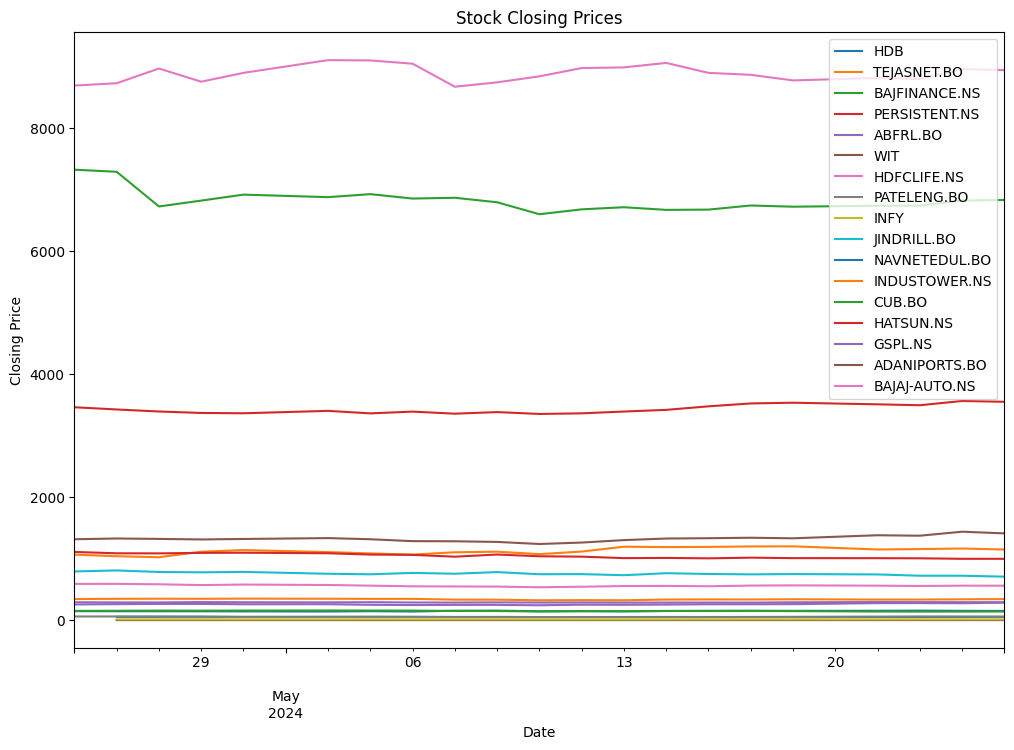

In [36]:
import matplotlib.pyplot as plt

def plot_stock_data(stock_data):
    plt.figure(figsize=(12, 8))
    for stock, data in stock_data.items():
        data['Close'].plot(label=stock)
    plt.title('Stock Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()

plot_stock_data(stock_data)